# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Definisi Fungsi

fungsi jarak antara dua instance

In [ ]:
def hitungJarak(instance1, instance2):
  return math.sqrt(pow(instance1['price']-instance2['price'],2)+pow(instance1['bedrooms']-instance2['bedrooms'],2)+
                   pow(instance1['bathrooms']-instance2['bathrooms'],2)+pow(instance1['sqft_living']-instance2['sqft_living'],2)+
                   pow(instance1['sqft_living']-instance2['sqft_living'],2)+pow(instance1['sqft_lot']-instance2['sqft_lot'],2)+
                   pow(instance1['floors']-instance2['floors'],2)+pow(instance1['waterfront']-instance2['waterfront'],2)+
                   pow(instance1['view']-instance2['view'],2)+pow(instance1['condition']-instance2['condition'],2)+
                   pow(instance1['grade']-instance2['grade'],2)+pow(instance1['sqft_above']-instance2['sqft_above'],2)+
                   pow(instance1['sqft_basement']-instance2['sqft_basement'],2)+pow(instance1['yr_built']-instance2['yr_built'],2)+
                   pow(instance1['yr_renovated']-instance2['yr_renovated'],2)+pow(instance1['lat']-instance2['lat'],2)+
                   pow(instance1['long']-instance2['long'],2)+pow(instance1['sqft_living15']-instance2['sqft_living15'],2)+
                   pow(instance1['sqft_lot15']-instance2['sqft_lot15'],2))

fungsi untuk mencari centroid terdekat

In [ ]:
def bandingkanCentroid(centroid, instance, k):
  jarakMin = hitungJarak(centroid.iloc[0],instance)
  idxJarakMin = 0
  for i in range(k-1):
    if(hitungJarak(centroid.iloc[i+1],instance)<=jarakMin):
      jarakMin = hitungJarak(centroid.iloc[i+1],instance)
      idxJarakMin = i+1
  return idxJarakMin

fungsi memperbarui centroid

In [ ]:
def perbaruiCentroid(data, k):
  centroid = pd.DataFrame(columns=["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat","long","sqft_living15","sqft_lot15", "klaster"])
  for i in range(k):
    trash_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,trash_zipcode,lat,long,sqft_living15,sqft_lot15,klaster = (data.loc[data['klaster']==i]).mean()
    tmp = pd.DataFrame([{'price': price, 'bedrooms': bedrooms, 'bathrooms':bathrooms, 'sqft_living':sqft_living, 'sqft_lot':sqft_lot, 'floors':floors, 'waterfront':waterfront, 'view':view, 'condition':condition, 'grade':grade, 'sqft_above':sqft_above, 'sqft_basement':sqft_basement, 'yr_built':yr_built, 'yr_renovated':yr_renovated, 'lat':lat, 'long':long, 'sqft_living15':sqft_living15, 'sqft_lot15':sqft_lot15, 'klaster':i}])
    centroid = centroid.append(tmp, ignore_index = True)
  return centroid

# Load Data

Download Data

In [ ]:
!wget -O kc_house_data.csv https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv

--2019-12-04 11:01:26--  https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368640 (360K) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>] 360.00K  --.-KB/s    in 0.03s   

2019-12-04 11:01:26 (11.8 MB/s) - ‘kc_house_data.csv’ saved [368640/368640]



**Load Data**

menampilkan dataset

In [ ]:
df = pd.read_csv("kc_house_data.csv")

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


**Ukuran Data**

data memiliki 21 atribut dan berjumlah 3165 instance

In [ ]:
df.shape
jumlah_data, jumlah_atribut = df.shape

# Praproses

Missing value

In [ ]:
df.isnull().values.any()

True

mencari null value dengan total nilai kosong disetiap kolom(atribut) 

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    1
sqft_lot15       1
dtype: int64

data ke 3164 memiliki missing value untuk atribut sqft_living15

In [ ]:
bool_series = pd.isnull(df['sqft_living15'])
df[bool_series]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3164,6021503830,20140620T000000,480000.0,4,1.0,2080,5500,1.0,0,0,3,7,1040,1040,1941,0,98117,47.6838,-122.3,NaN,NaN


data ke 3164 memiliki missing value untuk atribut sqft_lot15

In [ ]:
bool_series = pd.isnull(df['sqft_lot15'])
df[bool_series]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3164,6021503830,20140620T000000,480000.0,4,1.0,2080,5500,1.0,0,0,3,7,1040,1040,1941,0,98117,47.6838,-122.3,NaN,NaN


drop null value

In [ ]:
df=df.dropna()

df.shape
jumlah_data, jumlah_atribut = df.shape

**Rangkuman Data**

deskripsi setiap atribut

*Summary Statistic*

DataFrame.count : Hitung jumlah pengamatan non-NA / null.

DataFrame.max : Maksimum nilai dalam objek.

DataFrame.min : Minimum nilai dalam objek.

DataFrame.mean : Nilai rata-rata.

DataFrame.std : Standar deviasi pengamatan.

In [ ]:
df[["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat","long","sqft_living15","sqft_lot15"]].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,3.164000e+03,3164.000000,3164.000000,3164.000000,3.164000e+03,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,5.354358e+05,3.381163,2.071903,2070.027813,1.525054e+04,1.434893,0.009798,0.244311,3.459229,7.615676,1761.252212,308.775601,1967.489254,94.668774,47.557868,-122.212337,1982.544564,13176.302465
std,3.809004e+05,0.895472,0.768212,920.251879,4.254457e+04,0.507792,0.098513,0.776298,0.682592,1.166324,815.934864,458.977904,28.095275,424.439427,0.140789,0.139577,686.256670,25413.180755
min,7.500000e+04,0.000000,0.000000,380.000000,6.490000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,47.177500,-122.514000,620.000000,660.000000
25%,3.150000e+05,3.000000,1.500000,1430.000000,5.453750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1950.000000,0.000000,47.459575,-122.324250,1480.000000,5429.500000
50%,4.450000e+05,3.000000,2.000000,1910.000000,8.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1545.000000,0.000000,1969.000000,0.000000,47.572500,-122.226000,1830.000000,7873.000000
75%,6.402500e+05,4.000000,2.500000,2500.000000,1.122250e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,600.000000,1990.000000,0.000000,47.680250,-122.124000,2360.000000,10408.250000
max,5.350000e+06,8.000000,6.000000,8010.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,6720.000000,2620.000000,2015.000000,2015.000000,47.777600,-121.315000,5790.000000,425581.000000


# Unsupervised : KMeans

In [ ]:
print(hitungJarak(df.iloc[2], df.iloc[0]))

42222.73593754873


**Inisiasi**

parameter yang dapat diubah:
1. k adalah jumlah klaster
2. jumlah iterasi

In [ ]:
k = 3
jumlah_iterasi = 10
df['klaster'] = np.nan
#pilih instance centroid secara random
centroid = df.iloc[0:k]

**Update Centroid**

1. melakukan assign instance kedalam klaster terdekat
2. memperbarui centroid

In [ ]:
for t in range(jumlah_iterasi):
  print(t/jumlah_iterasi*100,"%")
  #assign instance ke dalam klaster terdekat
  for i in range(jumlah_data):
    df.loc[i, 'klaster'] = bandingkanCentroid(centroid, df.iloc[i], k)

  #perbarui centroid
  centroid = perbaruiCentroid(df, k)

0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %


Visualisasi

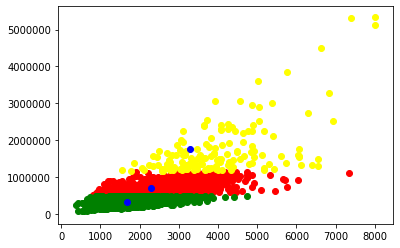

In [ ]:
plt.scatter((df.loc[df['klaster']==0])['sqft_living'], (df.loc[df['klaster']==0])['price'], color = 'red')
plt.scatter((df.loc[df['klaster']==1])['sqft_living'], (df.loc[df['klaster']==1])['price'], color = 'yellow')
plt.scatter((df.loc[df['klaster']==2])['sqft_living'], (df.loc[df['klaster']==2])['price'], color = 'green')
plt.scatter(centroid['sqft_living15'], centroid['price'], color = 'blue')
plt.show()